In [35]:
#import libraries 
import pandas as pd
import json
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#visualization style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11

In [37]:
#load json files
data = []
for file in glob.glob("../results/*.json"):
    with open(file) as f:
        d = json.load(f)
        d["filename"] = file
        data.append(d)

df = pd.DataFrame(data)
df['total_time_min'] = df['total_time_sec'] / 60
df.sort_values(by="sample_fraction", ascending=True, inplace=True)
df


,train_count,val_count,test_count,num_partitions,val_accuracy,test_accuracy,training_time_sec,total_time_sec,num_executors,executor_cores,sample_fraction,executor_memory,spark_metrics,filename,total_time_min
0,59109292,7015284,11836835,23,0.8094,0.7701,174.03,321.04,1,2,0.01,7,"{'numStages': 42, 'numTasks': 1497, 'elapsedTi...",../results/fractal-rf-e7g-x1-f0.01.json,5.350667
4,59109292,7015284,11836835,24,0.8074,0.7712,188.67,280.64,4,2,0.01,7,"{'numStages': 58, 'numTasks': 1891, 'elapsedTi...",../results/fractal-rf-e7g-x4-f0.01.json,4.677333
10,59109292,7015284,11836835,23,0.8094,0.7701,173.35,265.51,2,2,0.01,7,"{'numStages': 50, 'numTasks': 1593, 'elapsedTi...",../results/fractal-rf-e7g-x2-f0.01.json,4.425167
5,248515837,29591154,40674645,103,0.8052,0.7905,693.33,944.66,2,2,0.05,7,"{'numStages': 42, 'numTasks': 6985, 'elapsedTi...",../results/fractal-rf-e7g-x2-f0.05.json,15.744333
6,248515837,29591154,40674645,103,0.8052,0.7905,709.47,976.40,1,2,0.05,7,"{'numStages': 42, 'numTasks': 6985, 'elapsedTi...",../results/fractal-rf-e7g-x1-f0.05.json,16.273333
7,248515837,29591154,40674645,103,0.8052,0.7905,678.88,940.88,4,2,0.05,7,"{'numStages': 50, 'numTasks': 7177, 'elapsedTi...",../results/fractal-rf-e7g-x4-f0.05.json,15.681333
1,491467368,61748129,70983222,206,0.8009,0.7889,1392.92,1855.49,2,2,0.10,7,"{'numStages': 42, 'numTasks': 13943, 'elapsedT...",../results/fractal-rf-e7g-x2-f0.1.json,30.924833
3,491467368,61748129,70983222,206,0.8009,0.7889,1380.16,1846.05,4,2,0.10,7,"{'numStages': 42, 'numTasks': 13943, 'elapsedT...",../results/fractal-rf-e7g-x4-f0.1.json,30.767500
9,491467368,61748129,70983222,206,0.8009,0.7889,1404.61,1870.89,1,2,0.10,7,"{'numStages': 42, 'numTasks': 13943, 'elapsedT...",../results/fractal-rf-e7g-x1-f0.1.json,31.181500
2,1201961027,151271518,132641697,445,0.7562,0.7801,3392.05,4326.83,1,2,0.20,7,"{'numStages': 42, 'numTasks': 22465, 'elapsedT...",../results/fractal-rf-e7g-x1-f0.2.json,72.113833


In [42]:
df['executor_memory'].unique()

array([7])

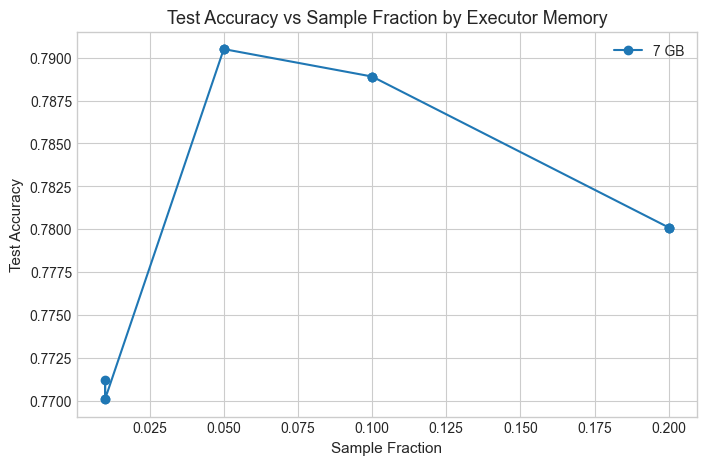

In [38]:
# --- Test Accuracy vs Sample Fraction ---
plt.figure()
for mem in sorted(df["executor_memory"].dropna().unique()):
    subset = df[df["executor_memory"] == mem]
    plt.plot(subset["sample_fraction"], subset["test_accuracy"], marker="o", label=f"{mem} GB")
plt.xlabel("Sample Fraction")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Sample Fraction by Executor Memory")
plt.legend()
plt.show()

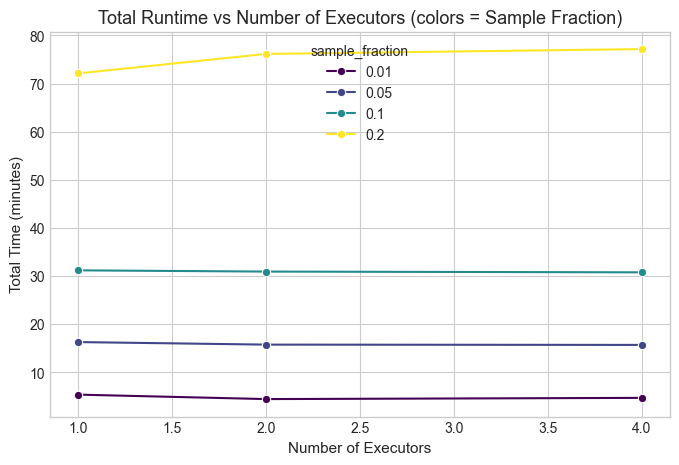

In [39]:
#Runtime vs Sample Fraction

sns.lineplot(
    data=df,
    x="num_executors",
    y="total_time_min",
    hue="sample_fraction",   # each color = different sample fraction
    marker="o",
    palette="viridis"
)

plt.title("Total Runtime vs Number of Executors (colors = Sample Fraction)")
plt.xlabel("Number of Executors")
plt.ylabel("Total Time (minutes)")
plt.grid(True)

#executor cores and executor memory never change


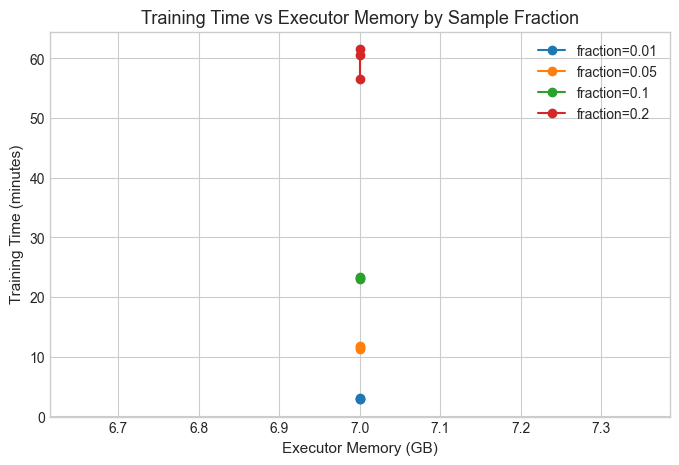

In [40]:
# --- Training Time vs Executor Memory ---
plt.figure()
for frac in sorted(df["sample_fraction"].dropna().unique()):
    subset = df[df["sample_fraction"] == frac]
    plt.plot(subset["executor_memory"], subset["training_time_sec"]/60, marker="o", label=f"fraction={frac}")
plt.xlabel("Executor Memory (GB)")
plt.ylabel("Training Time (minutes)")
plt.title("Training Time vs Executor Memory by Sample Fraction")
plt.legend()
plt.show()

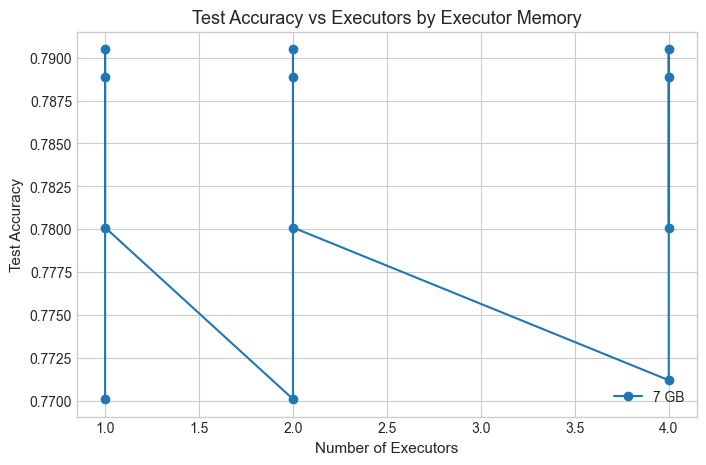

In [41]:
df.sort_values(by="num_executors", ascending=True, inplace=True)

# --- Test Accuracy vs Number of Executors ---
if "num_executors" in df.columns:
    plt.figure()
    for mem in sorted(df["executor_memory"].dropna().unique()):
        subset = df[df["executor_memory"] == mem]
        plt.plot(subset["num_executors"], subset["test_accuracy"], marker="o", label=f"{mem} GB")
    plt.xlabel("Number of Executors")
    plt.ylabel("Test Accuracy")
    plt.title("Test Accuracy vs Executors by Executor Memory")
    plt.legend()
    plt.show()